### MODELING AND MODEL DEVELOPMENT

In [1]:
#import needed modules
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import regression module
from sklearn.linear_model import LinearRegression
# create model object
lm = LinearRegression()

In [3]:
# import train/test split module
from sklearn.model_selection import train_test_split

In [4]:
#load the file
df= pd.read_csv('Uptake.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   District              60 non-null     object 
 1   Region                60 non-null     object 
 2   Population            60 non-null     object 
 3   Total_households      60 non-null     object 
 4   Population_density    60 non-null     object 
 5   Zonning               60 non-null     object 
 6   Avg_Age               60 non-null     float64
 7   literacy_rate_%       60 non-null     float64
 8   people_per_household  60 non-null     float64
 9   Employment_rate       60 non-null     object 
 10  speed_test_count      60 non-null     int64  
 11  tests_per_population  60 non-null     object 
dtypes: float64(3), int64(1), object(8)
memory usage: 5.8+ KB


In [6]:
df.head()

,District,Region,Population,Total_households,Population_density,Zonning,Avg_Age,literacy_rate_%,people_per_household,Employment_rate,speed_test_count,tests_per_population
0,Kampala,Central,"1,680,600","462,400",229,urban,15.9,75.0,3.6,69.5,6629,0.3944%
1,Buikwe,Central,"474,100","114,100",366.4,town,16.0,75.0,4.2,65,155,0.0327%
2,Wakiso,Central,"2,915,200","730,800","1,500",urban,17.0,81.0,4.0,35,2116,0.0726%
3,Gulu,Northern,"325,600","65,600",89.1,urban,17.0,75.0,5.0,67.4,341,0.1047%
4,Mukono,Central,"701,400","174,900",379.1,Mixed,17.0,75.0,4.0,66,119,0.0170%


In [7]:
df.replace(',','', regex=True, inplace=True)
df.replace('%','', regex=True, inplace=True)

In [8]:
df.head()

,District,Region,Population,Total_households,Population_density,Zonning,Avg_Age,literacy_rate_%,people_per_household,Employment_rate,speed_test_count,tests_per_population
0,Kampala,Central,1680600,462400,229,urban,15.9,75.0,3.6,69.5,6629,0.3944
1,Buikwe,Central,474100,114100,366.4,town,16.0,75.0,4.2,65,155,0.0327
2,Wakiso,Central,2915200,730800,1500,urban,17.0,81.0,4.0,35,2116,0.0726
3,Gulu,Northern,325600,65600,89.1,urban,17.0,75.0,5.0,67.4,341,0.1047
4,Mukono,Central,701400,174900,379.1,Mixed,17.0,75.0,4.0,66,119,0.0170


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   District              60 non-null     object 
 1   Region                60 non-null     object 
 2   Population            60 non-null     object 
 3   Total_households      60 non-null     object 
 4   Population_density    60 non-null     object 
 5   Zonning               60 non-null     object 
 6   Avg_Age               60 non-null     float64
 7   literacy_rate_%       60 non-null     float64
 8   people_per_household  60 non-null     float64
 9   Employment_rate       60 non-null     object 
 10  speed_test_count      60 non-null     int64  
 11  tests_per_population  60 non-null     object 
dtypes: float64(3), int64(1), object(8)
memory usage: 5.8+ KB


In [10]:
c = ['Population','Total_households', 'Population_density', 'Employment_rate',
       'tests_per_population']
df[c] = df[c].apply(pd.to_numeric,errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   District              60 non-null     object 
 1   Region                60 non-null     object 
 2   Population            60 non-null     int64  
 3   Total_households      60 non-null     int64  
 4   Population_density    60 non-null     float64
 5   Zonning               60 non-null     object 
 6   Avg_Age               60 non-null     float64
 7   literacy_rate_%       60 non-null     float64
 8   people_per_household  60 non-null     float64
 9   Employment_rate       60 non-null     float64
 10  speed_test_count      60 non-null     int64  
 11  tests_per_population  60 non-null     float64
dtypes: float64(6), int64(3), object(3)
memory usage: 5.8+ KB


In [12]:
df.Region.value_counts()

Western     20
Central     16
Northern    15
Eastern      9
Name: Region, dtype: int64

In [13]:
df.Zonning.value_counts()

Mixed    47
Rural     4
urban     3
mixed     2
Town      2
town      1
Urban     1
Name: Zonning, dtype: int64

In [14]:
df['Zonning']= df['Zonning'].apply(str.lower)

In [15]:
df.Zonning.value_counts()

mixed    49
urban     4
rural     4
town      3
Name: Zonning, dtype: int64

In [16]:
df['Region'].replace(['Central','Eastern','Northern','Western'], [1,2,3,4], inplace= True)
df['Zonning'].replace(['mixed','urban','rural','town'], [1,2,3,4], inplace=True)

In [17]:
df.head()

,District,Region,Population,Total_households,Population_density,Zonning,Avg_Age,literacy_rate_%,people_per_household,Employment_rate,speed_test_count,tests_per_population
0,Kampala,1,1680600,462400,229.0,2,15.9,75.0,3.6,69.5,6629,0.3944
1,Buikwe,1,474100,114100,366.4,4,16.0,75.0,4.2,65.0,155,0.0327
2,Wakiso,1,2915200,730800,1500.0,2,17.0,81.0,4.0,35.0,2116,0.0726
3,Gulu,3,325600,65600,89.1,2,17.0,75.0,5.0,67.4,341,0.1047
4,Mukono,1,701400,174900,379.1,1,17.0,75.0,4.0,66.0,119,0.0170


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   District              60 non-null     object 
 1   Region                60 non-null     int64  
 2   Population            60 non-null     int64  
 3   Total_households      60 non-null     int64  
 4   Population_density    60 non-null     float64
 5   Zonning               60 non-null     int64  
 6   Avg_Age               60 non-null     float64
 7   literacy_rate_%       60 non-null     float64
 8   people_per_household  60 non-null     float64
 9   Employment_rate       60 non-null     float64
 10  speed_test_count      60 non-null     int64  
 11  tests_per_population  60 non-null     float64
dtypes: float64(6), int64(5), object(1)
memory usage: 5.8+ KB


In [19]:
df.rename(columns= {'tests_per_population': 'uptake_rate'}, inplace=True)

In [20]:
df.sample()

,District,Region,Population,Total_households,Population_density,Zonning,Avg_Age,literacy_rate_%,people_per_household,Employment_rate,speed_test_count,uptake_rate
12,Jinja,2,515100,115400,434.7,1,17.0,72.4,4.5,73.6,178,0.0346


In [21]:
df.columns = df.columns.str.replace(' ', '')

In [44]:
X= df.drop(['District','uptake_rate'], axis=1)
y= df['uptake_rate']

In [45]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)

In [46]:
# import regression module
from sklearn.linear_model import LinearRegression

In [47]:
lm=LinearRegression()

In [48]:
# train model
lm.fit(X_train, y_train)

LinearRegression()

In [49]:
lm.coef_.shape

(10,)

In [28]:
X.columns.shape

(10,)

In [29]:
# extract model coeffs
weights = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [30]:
weights

,Coefficient
Region,3.166913e-04
Population,7.710678e-08
Total_households,-3.592515e-07
Population_density,-5.452934e-06
Zonning,2.076203e-03
Avg_Age,6.624691e-03
literacy_rate_%,4.452618e-04
people_per_household,-2.646921e-03
Employment_rate,-3.130791e-04
speed_test_count,6.399054e-05


In [31]:
from sklearn import metrics
import math

In [32]:
# dictionary of results
results_dict = {'Training MSE':
                    {
                        "MLR": metrics.mean_squared_error(y_train, lm.predict(X_train))
                    },
                'Test MSE':
                    {
                        "MLR": metrics.mean_squared_error(y_test, lm.predict(X_test))
                    },
                'Test RMSE':
                    {
                        "MLR": math.sqrt(metrics.mean_squared_error(y_test, lm.predict(X_test)))
                    }
                }

In [33]:
# create dataframe from dictionary
metrics = pd.DataFrame(data=results_dict)
metrics

,Training MSE,Test MSE,Test RMSE
MLR,0.00015,0.00028,0.016727


In [51]:
Data = pd.read_csv('Uptake.csv')

In [52]:
Data.head()

,District,Region,Population,Total_households,Population_density,Zonning,Avg_Age,literacy_rate_%,people_per_household,Employment_rate,speed_test_count,tests_per_population
0,Kampala,Central,"1,680,600","462,400",229,urban,15.9,75.0,3.6,69.5,6629,0.3944%
1,Buikwe,Central,"474,100","114,100",366.4,town,16.0,75.0,4.2,65,155,0.0327%
2,Wakiso,Central,"2,915,200","730,800","1,500",urban,17.0,81.0,4.0,35,2116,0.0726%
3,Gulu,Northern,"325,600","65,600",89.1,urban,17.0,75.0,5.0,67.4,341,0.1047%
4,Mukono,Central,"701,400","174,900",379.1,Mixed,17.0,75.0,4.0,66,119,0.0170%


In [54]:
Data.rename(columns= {'tests_per_population': 'uptake_rate'}, inplace=True)

In [56]:
Data.replace(',','', regex=True, inplace=True)
Data.replace('%','', regex=True, inplace=True)

In [60]:
Data['Region'].replace(['Central','Eastern','Northern','Western'], [1,2,3,4], inplace= True)
Data['Zonning'].replace(['Mixed','urban','rural','town'], [1,2,3,4], inplace=True)

In [61]:
Data.head()

,District,Region,Population,Total_households,Population_density,Zonning,Avg_Age,literacy_rate_%,people_per_household,Employment_rate,speed_test_count,uptake_rate
0,Kampala,1,1680600,462400,229,2,15.9,75.0,3.6,69.5,6629,0.3944
1,Buikwe,1,474100,114100,366.4,4,16.0,75.0,4.2,65,155,0.0327
2,Wakiso,1,2915200,730800,1500,2,17.0,81.0,4.0,35,2116,0.0726
3,Gulu,3,325600,65600,89.1,2,17.0,75.0,5.0,67.4,341,0.1047
4,Mukono,1,701400,174900,379.1,1,17.0,75.0,4.0,66,119,0.0170


In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [83]:
x = Data['Employment_rate'].values
y = Data['uptake_rate'].values

In [84]:
X = x.reshape((-1,1))

In [85]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

In [86]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [87]:
x_test = np.linspace(1, 10, 100)
X_test = poly.fit_transform(x_test.reshape((-1, 1)))

In [88]:
y_pred = model.predict(X_test)

<IPython.core.display.Javascript object>


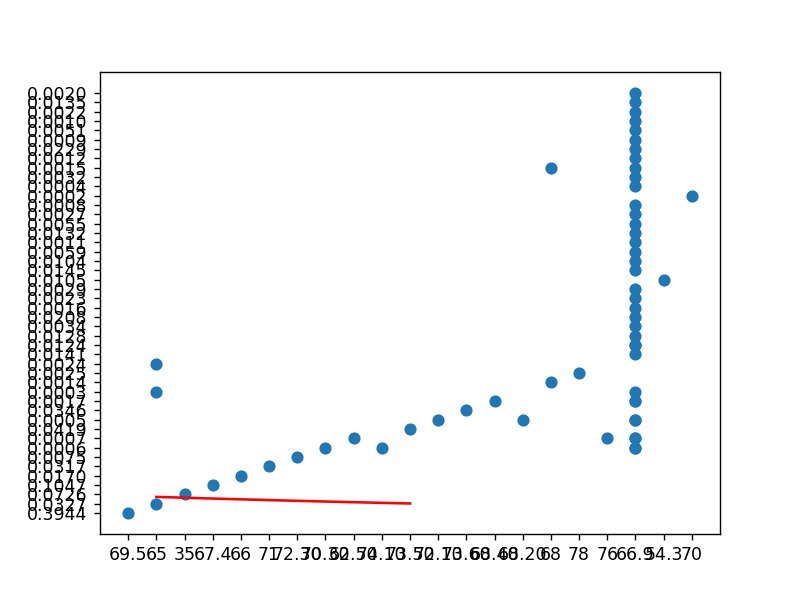

In [89]:
plt.scatter(x, y)
plt.plot(x_test, y_pred, color='red')
plt.show()